In [3]:
import pandas as pd 
from heapq import nlargest  # to find n largest from dictionary
import itertools  
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from matplotlib.colors import DivergingNorm
import pandas_bokeh
import bokeh
import pandas_profiling
import bokeh
import math
from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
import networkx as nx

In [2]:
pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [3]:
df = pd.read_csv("trail_1_AI.csv")

# EDA

In [4]:
df.describe()

Publication Year  Cited by Patent Count  Simple Family Size  \
count      50000.000000            50000.00000        50000.000000   
mean        2016.483320                7.28708           10.159880   
std            2.890565               22.60924           21.890767   
min         2010.000000                0.00000            1.000000   
25%         2014.000000                0.00000            2.000000   
50%         2017.000000                1.00000            5.000000   
75%         2019.000000                5.00000            9.000000   
max         2020.000000              551.00000          384.000000   

       Extended Family Size  Sequence Count  NPL Citation Count  \
count          50000.000000    5.000000e+04        50000.000000   
mean              34.532580    1.100102e+02           36.531360   
std              121.201905    1.571338e+04           96.476169   
min                1.000000    0.000000e+00            0.000000   
25%                3.000000    0.000000e+00            1.000000   
50%                6.000000    0.000000e+00            8.000000   
75%               16.000000    0.000000e+00           36.000000   
max             3596.000000    3.407294e+06         2372.000000   

       NPL Resolved Citation Count  
count                  50000.00000  
mean                      12.99712  
std                       45.49857  
min                        0.00000  
25%                        0.00000  
50%                        2.00000  
75%                        9.00000  
max                     1385.00000

# For top assignees vs number of patents 

In [5]:
# converting from pandas Series to list after dropping Empty/Null values
applicants = df['Applicants'].dropna().tolist()

# making dictionary for assignee (key) -> # of patents (value) 
applicants_dict = {}
for i in applicants:
    if i not in applicants_dict.keys():
        applicants_dict[i] = 1
    else:
        applicants_dict[i] += 1
        

# sorted dictionary from high number of patents to low
applicants_dict_sorted = {k: v for k, v in sorted(applicants_dict.items(), key=lambda item: item[1], reverse = True)}

# parameter to get top n assignees plot
n_top = 20    
out_dict = dict(itertools.islice(applicants_dict_sorted.items(), n_top))  

[]

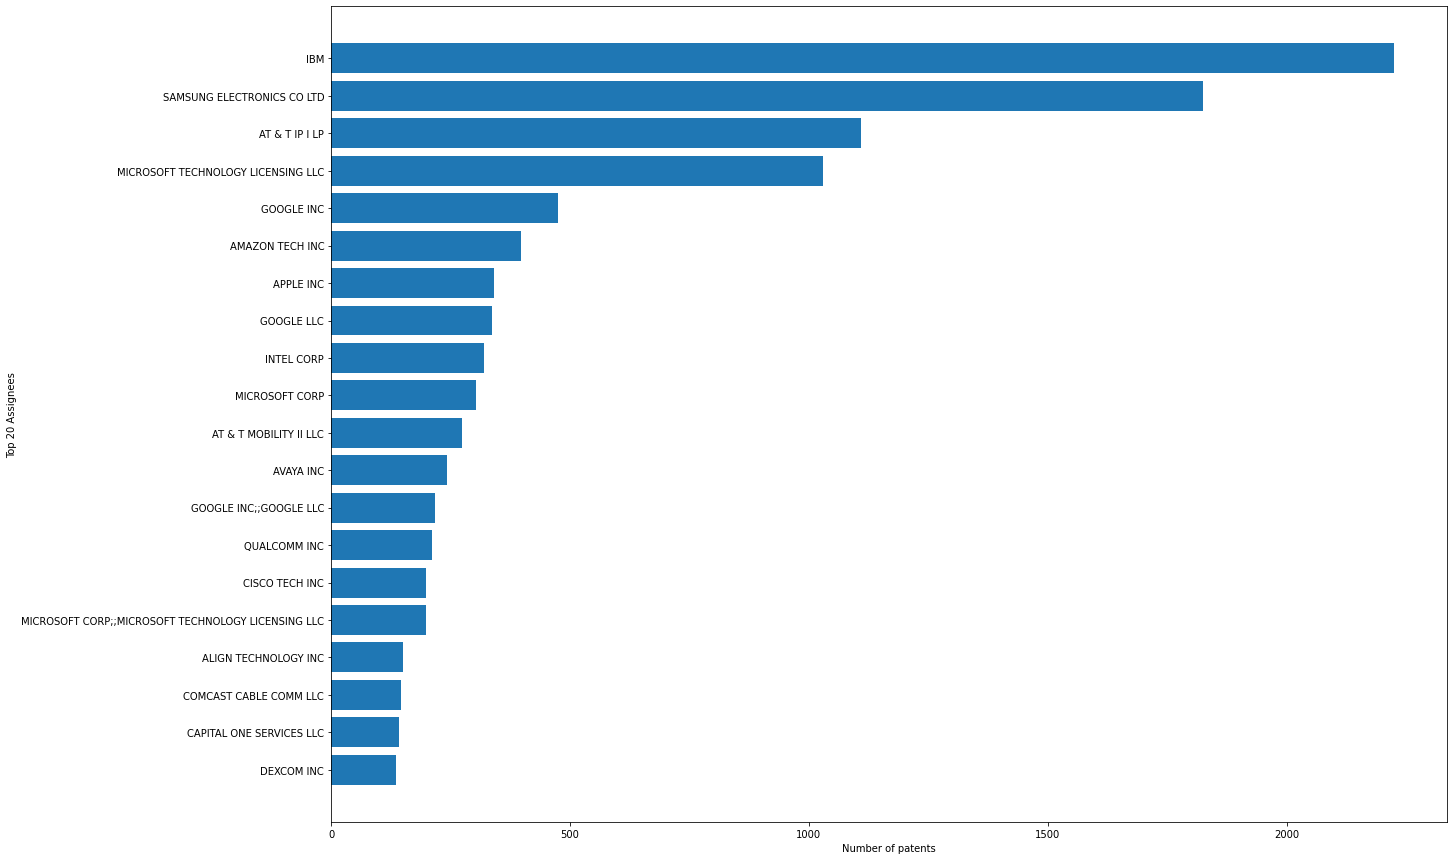

In [6]:
# plotting assignees vs number of patents 
keys = list(out_dict.keys())
values = list(out_dict.values())

df_assignee = pd.DataFrame({
    'Assignee' : keys, 
    '# of Patents' : values
})


plt.figure(figsize = (20, 15))
df_assignee.plot_bokeh.barh(x = 'Assignee', y = '# of Patents')


plt.barh(keys, values, )
plt.xlabel('Number of patents')
plt.ylabel(f'Top {n_top} Assignees')
plt.gca().invert_yaxis()
plt.plot()

# For top Inventors vs number of patents 

In [7]:
# converting from pandas Series to list after dropping Empty/Null values
inventors = df["Inventors"].dropna().tolist()

# making dictionary for assignee (key) -> # of patents (value) 
inventors_dict = {}
for j in inventors:
    inventor = j.split(";;")
    for i in inventor:
        if i not in inventors_dict.keys():
            inventors_dict[i] = 1
        else:
            inventors_dict[i] += 1
            
# sorted dictionary from high number of patents to low
inventors_dict_sorted = {k: v for k, v in sorted(inventors_dict.items(), key=lambda item: item[1], reverse = True)}

# parameter to get top n invetors plot
n_top = 20    
out_dict_inventor = dict(itertools.islice(inventors_dict_sorted.items(), n_top))  

[]

<Figure size 1440x1080 with 0 Axes>

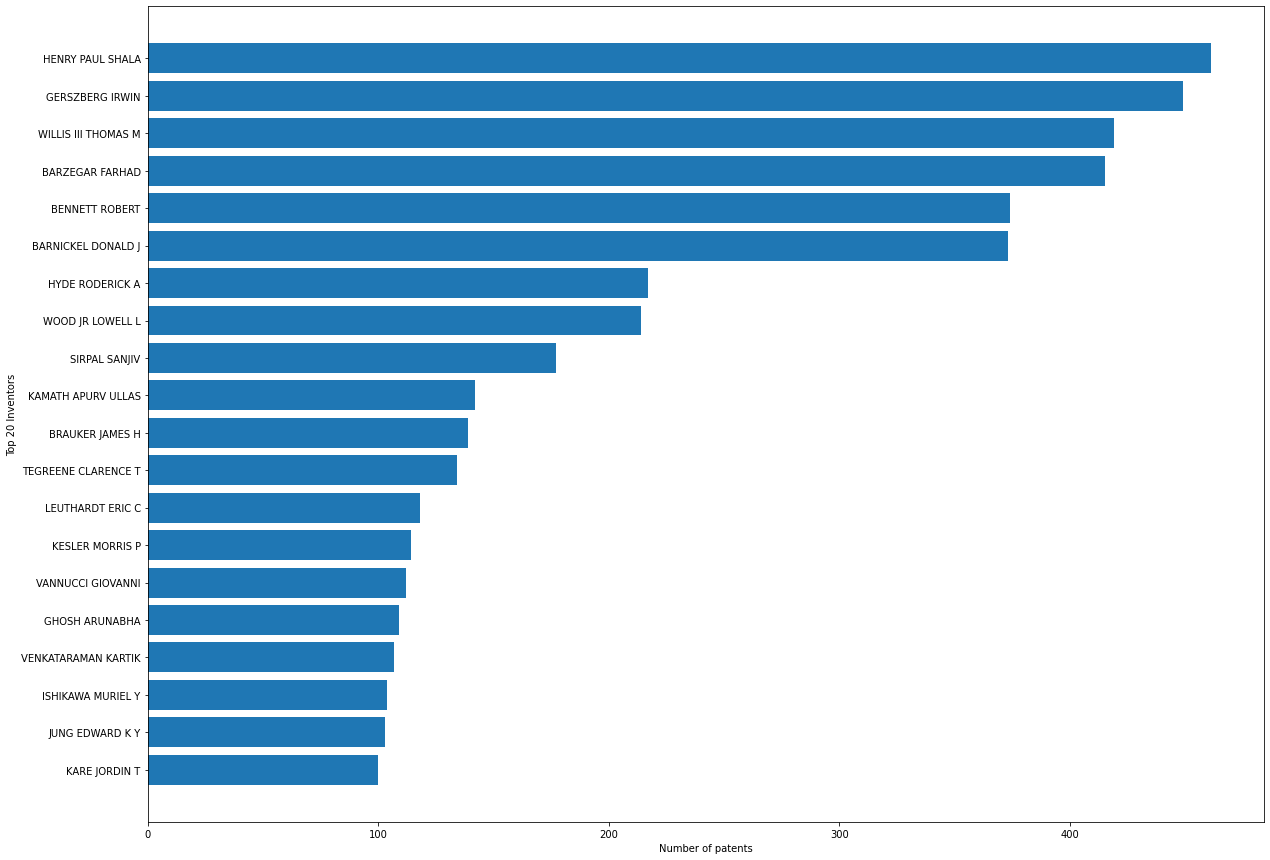

In [8]:
# plotting assignees vs number of patents 
keys_inventors = list(out_dict_inventor.keys())
values_inventors = list(out_dict_inventor.values())

df_inventor = pd.DataFrame({
    'Inventors' : keys_inventors, 
    '# of Patents' : values_inventors
})

plt.figure(figsize = (20, 15))
df_inventor.plot_bokeh.barh(x = 'Inventors', y = '# of Patents')
plt.figure(figsize = (20, 15))
plt.barh(keys_inventors, values_inventors)
plt.xlabel('Number of patents')
plt.ylabel(f'Top {n_top} Inventors')
plt.gca().invert_yaxis()
plt.plot()

# For Juridictions vs number of patents 

In [9]:
# converting from pandas Series to list after dropping Empty/Null values
juridictions = df['Jurisdiction'].dropna().tolist()

# making dictionary for assignee (key) -> # of patents (value) 
juridictions_dict = {}
for i in juridictions:
    if len(i) <= 3:
        if i not in juridictions_dict.keys():
            juridictions_dict[i] = 1
        else:
            juridictions_dict[i] += 1
            
# # sorted dictionary from high number of patents to low
# juridictions_dict_sorted = {k: v for k, v in sorted(inventors_dict.items(), key=lambda item: item[1], reverse = True)}

# # parameter to get top n invetors plot
# n_top = 50    
# out_dict_inventor = dict(itertools.islice(inventors_dict_sorted.items(), n_top))  

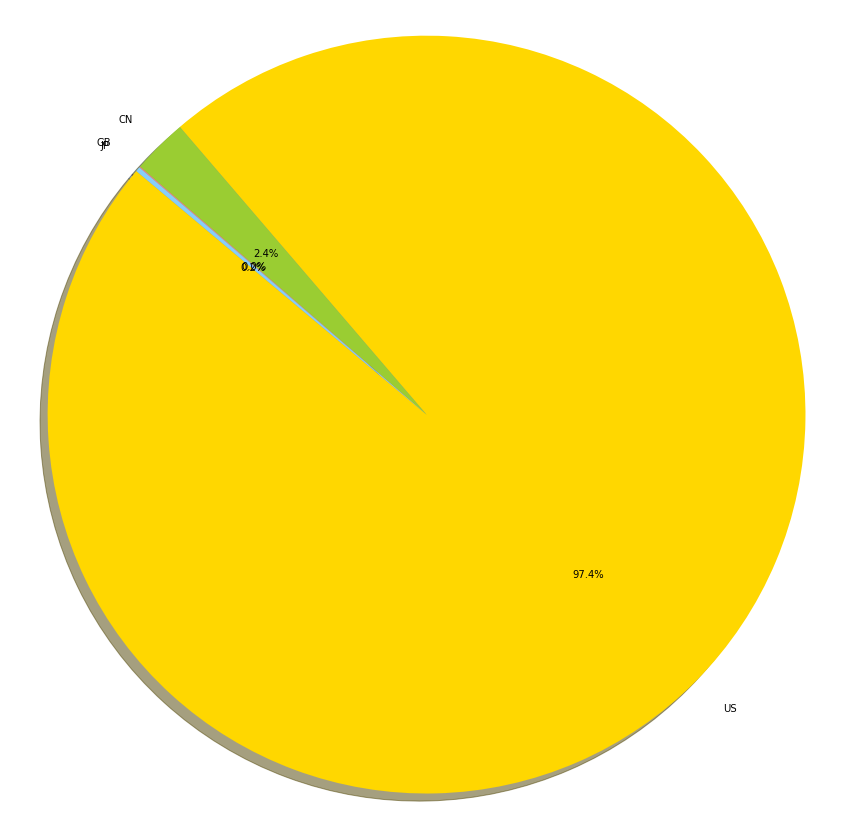

In [10]:
# Pie Chart for Juridictions vs # of patents
labels = list(juridictions_dict.keys())
sizes = list(juridictions_dict.values())
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize = (15, 15))
plt.pie(sizes, labels = labels, colors = colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

data = pd.Series(juridictions_dict).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*math.pi
data['color'] = Category20c[len(juridictions_dict)]

p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

# Inventors Network

In [4]:
# converting from pandas Series to list after dropping Empty/Null values
inventors = df["Inventors"].dropna().tolist()

# making dictionary for assignee (key) -> # of patents (value) 
inventors_net = {}
for j in inventors:
    inventor = j.split(";;")
    for i in inventor:
        for j in inventor:
            if i != j:
                key1 = i + ',' + j
                key2 = j + ',' + i
                if key1 not in inventors_net.keys() and key2 not in inventors_net.keys():
                    inventors_net[key1] = 1
                elif key1 in inventors_net.keys():
                    inventors_net[key1] += 1
                elif key2 in inventors_net.keys():
                    inventors_net[key2] += 1

"""         if i not in inventors_dict.keys():
            inventors_dict[i] = 1
        else:
            inventors_dict[i] += 1 """
            
# sorted dictionary from high number of patents to low
inventors_net_sorted = {k: v for k, v in sorted(inventors_net.items(), key=lambda item: item[1], reverse = True)}

# parameter to get top n invetors plot
n_top = 100    
out_net_inventor = dict(itertools.islice(inventors_net_sorted.items(), n_top))  

In [8]:
inventor1 = []
inventor2 = []
count = []
for i in out_net_inventor:
    inven = i.split(',')
    inventor1.append(inven[0])
    inventor2.append(inven[1])
    count.append(out_net_inventor[i])

# initialize network
G = nx.Graph()
for i in range(len(inventor1)):
    G.add_edge(inventor1[i], inventor2[i], count = count[i])

counts = nx.get_edge_attributes(G, 'count')

plt.figure(figsize = (20, 20))
nx.draw_networkx(G, with_labels = True)
nx.draw_networkx_edge_labels(counts)

TypeError: draw_networkx_edge_labels() missing 1 required positional argument: 'pos'

{('WILLIS III THOMAS M', 'HENRY PAUL SHALA'): 838,
 ('WILLIS III THOMAS M', 'BARZEGAR FARHAD'): 748,
 ('WILLIS III THOMAS M', 'GERSZBERG IRWIN'): 748,
 ('WILLIS III THOMAS M', 'BARNICKEL DONALD J'): 730,
 ('WILLIS III THOMAS M', 'BENNETT ROBERT'): 712,
 ('WILLIS III THOMAS M', 'VANNUCCI GIOVANNI'): 188,
 ('HENRY PAUL SHALA', 'GERSZBERG IRWIN'): 820,
 ('HENRY PAUL SHALA', 'BARZEGAR FARHAD'): 812,
 ('HENRY PAUL SHALA', 'BENNETT ROBERT'): 738,
 ('HENRY PAUL SHALA', 'BARNICKEL DONALD J'): 738,
 ('HENRY PAUL SHALA', 'VANNUCCI GIOVANNI'): 222,
 ('BARZEGAR FARHAD', 'GERSZBERG IRWIN'): 828,
 ('BARZEGAR FARHAD', 'BENNETT ROBERT'): 742,
 ('BARZEGAR FARHAD', 'BARNICKEL DONALD J'): 740,
 ('BARZEGAR FARHAD', 'VANNUCCI GIOVANNI'): 132,
 ('GERSZBERG IRWIN', 'BENNETT ROBERT'): 746,
 ('GERSZBERG IRWIN', 'BARNICKEL DONALD J'): 744,
 ('GERSZBERG IRWIN', 'VANNUCCI GIOVANNI'): 132,
 ('BENNETT ROBERT', 'BARNICKEL DONALD J'): 718,
 ('BENNETT ROBERT', 'VANNUCCI GIOVANNI'): 102,
 ('HYDE RODERICK A', 'WOOD JR L

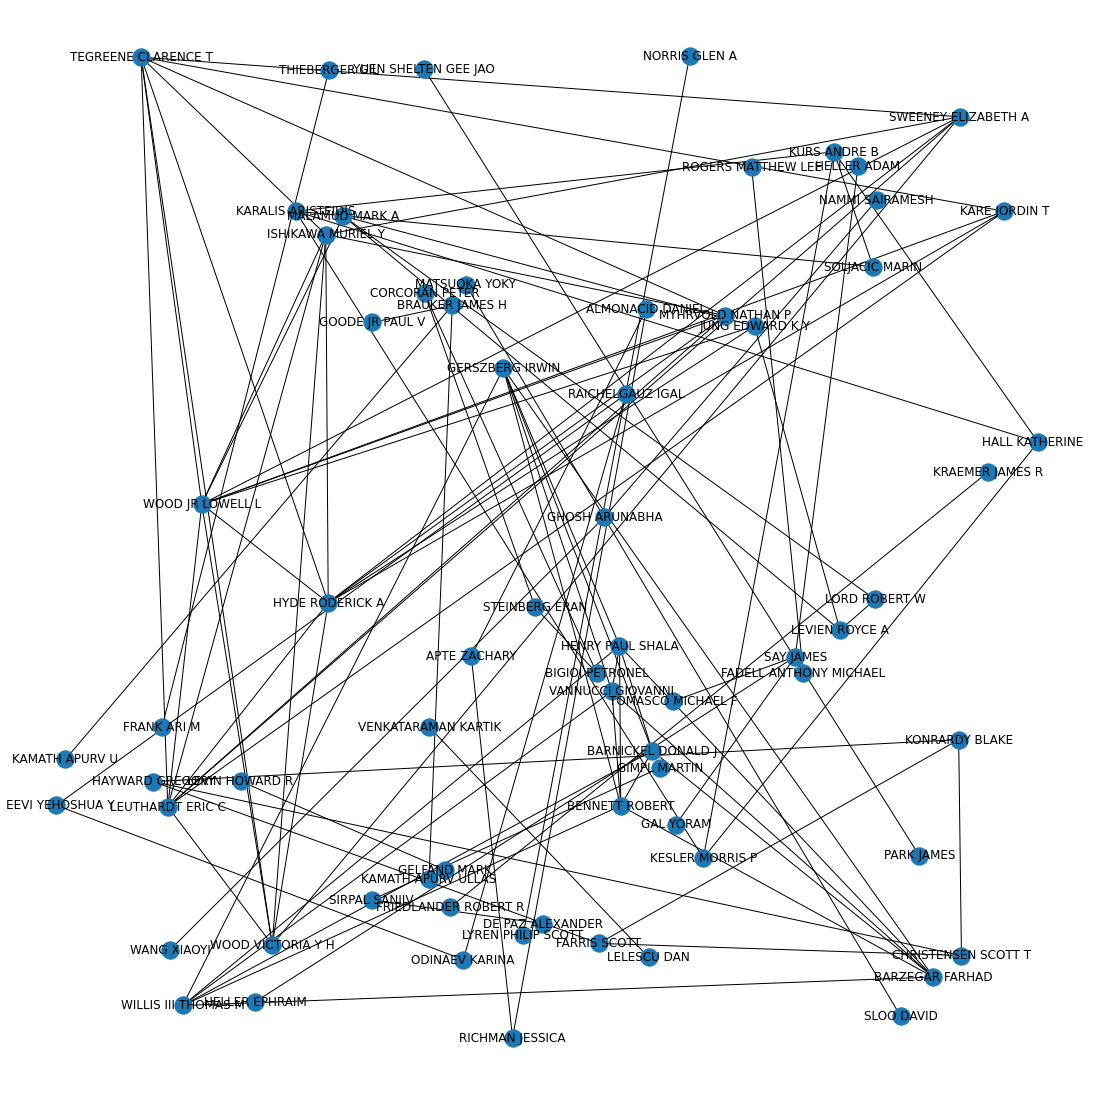

In [5]:
inventor1 = []
inventor2 = []
count = []
for i in out_net_inventor:
    inven = i.split(',')
    inventor1.append(inven[0])
    inventor2.append(inven[1])
    count.append(out_net_inventor[i])

df_net = pd.DataFrame({
    'inventor1' : inventor1,
    'inventor2' : inventor2,
    'patent_count' : count
})

G = nx.Graph()
G = nx.from_pandas_edgelist(df_net, 'inventor1', 'inventor2', edge_attr = 'patent_count')
count = [i['patent_count'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}
plt.figure(figsize = (15, 15))
nx.draw_random(G, with_labels=True)
plt.show()

In [67]:
G['GERSZBERG IRWIN']

AtlasView({'BARZEGAR FARHAD': {'patent_count': 828}, 'HENRY PAUL SHALA': {'patent_count': 820}, 'WILLIS III THOMAS M': {'patent_count': 748}, 'BENNETT ROBERT': {'patent_count': 746}, 'BARNICKEL DONALD J': {'patent_count': 744}, 'VANNUCCI GIOVANNI': {'patent_count': 132}})

In [68]:
G['BARZEGAR FARHAD']

AtlasView({'GERSZBERG IRWIN': {'patent_count': 828}, 'HENRY PAUL SHALA': {'patent_count': 812}, 'WILLIS III THOMAS M': {'patent_count': 748}, 'BENNETT ROBERT': {'patent_count': 742}, 'BARNICKEL DONALD J': {'patent_count': 740}, 'VANNUCCI GIOVANNI': {'patent_count': 132}})

Top Assignees vs Number of Patents
Top Inventors vs Number of Patents
Top Juridictions vs Number of Patents


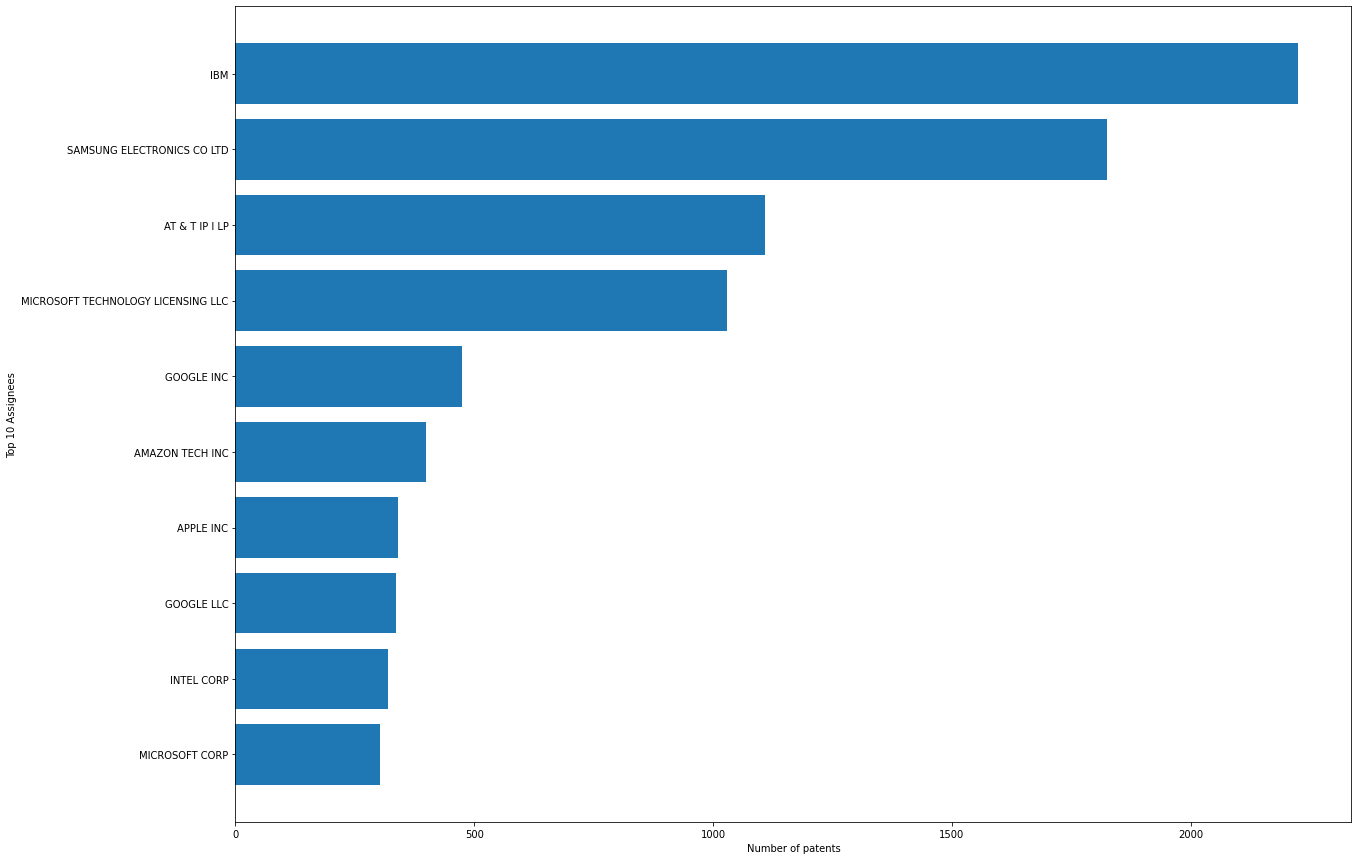

<Figure size 1440x1080 with 0 Axes>

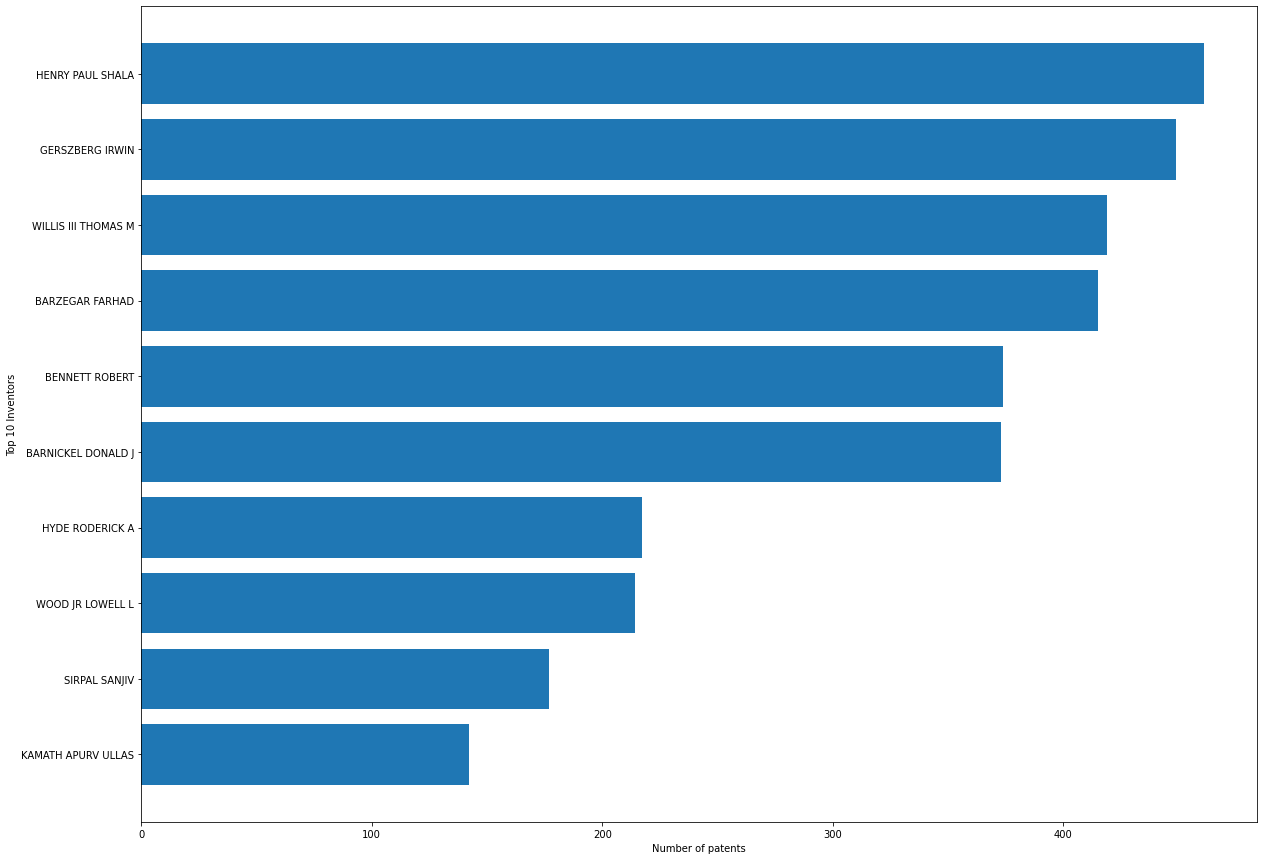

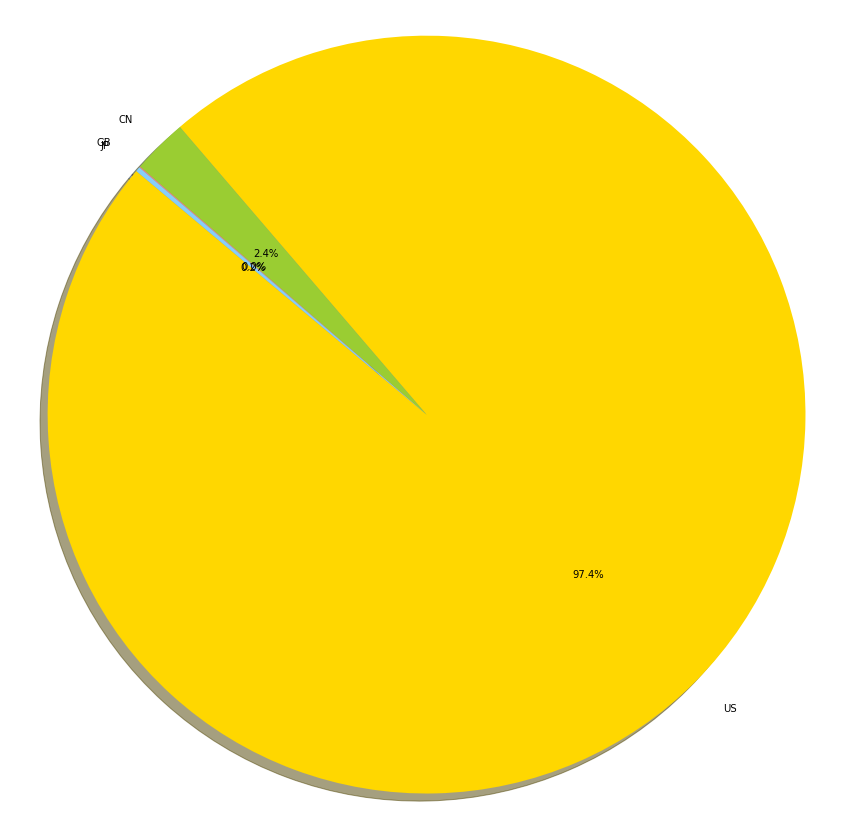

In [2]:
import BibliographicAnalysis as ba
ba.bibliographic_plots('trail_1_AI.csv', top_assignees=10, top_inventors=10)

Top Assignees vs Number of Patents


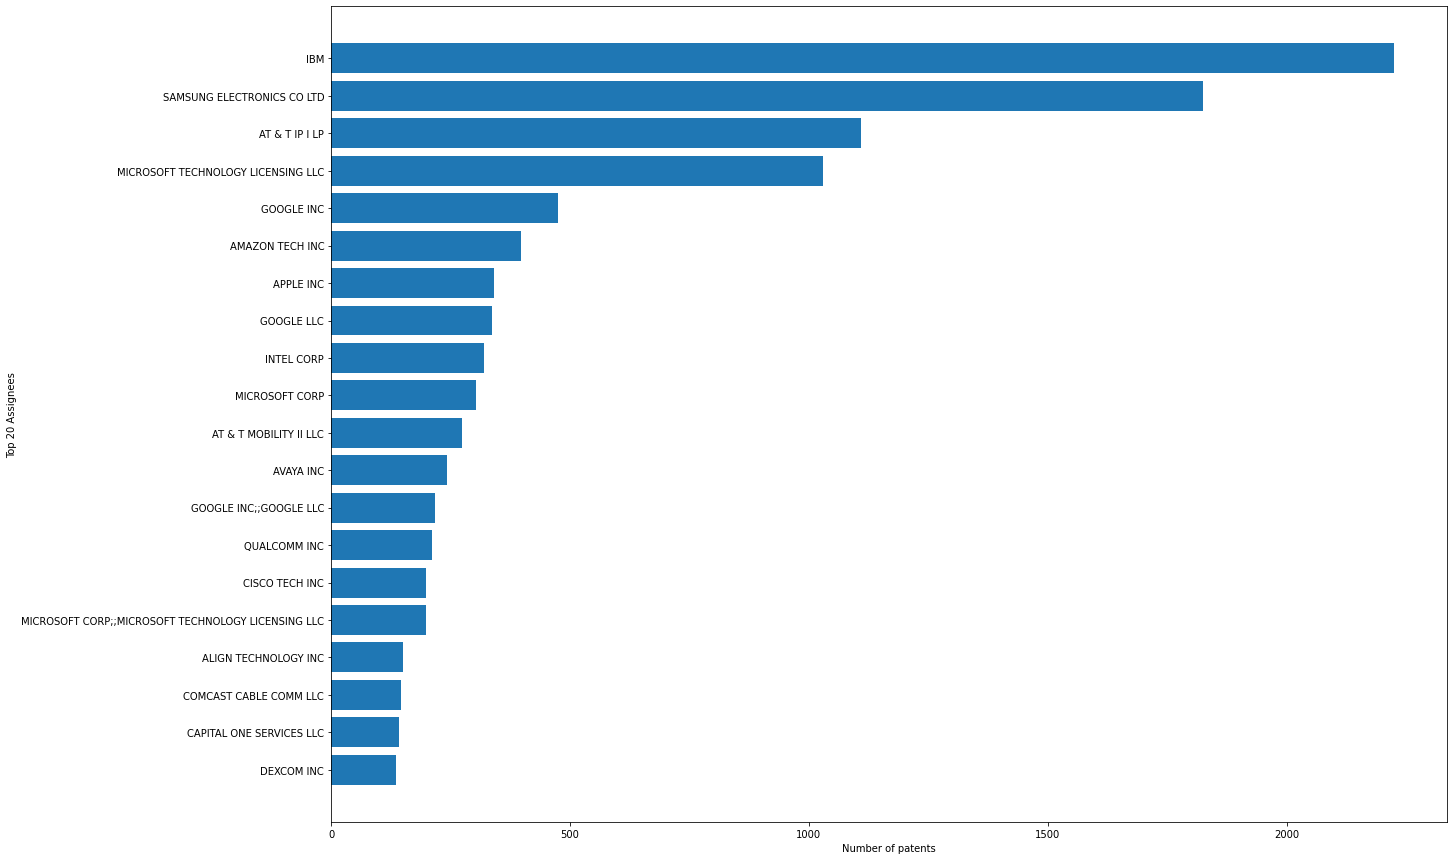

Top Inventors vs Number of Patents


<Figure size 1440x1080 with 0 Axes>

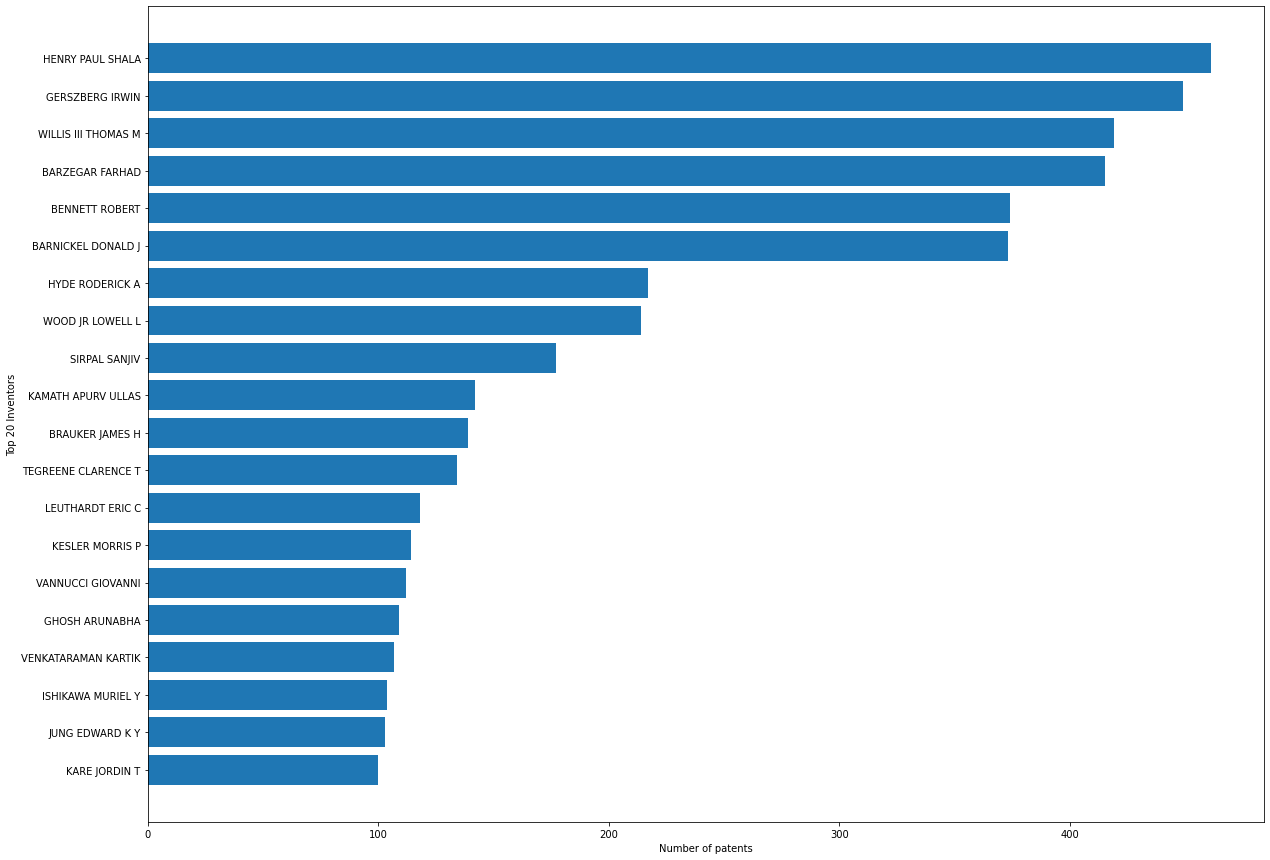

Top Juridictions vs Number of Patents


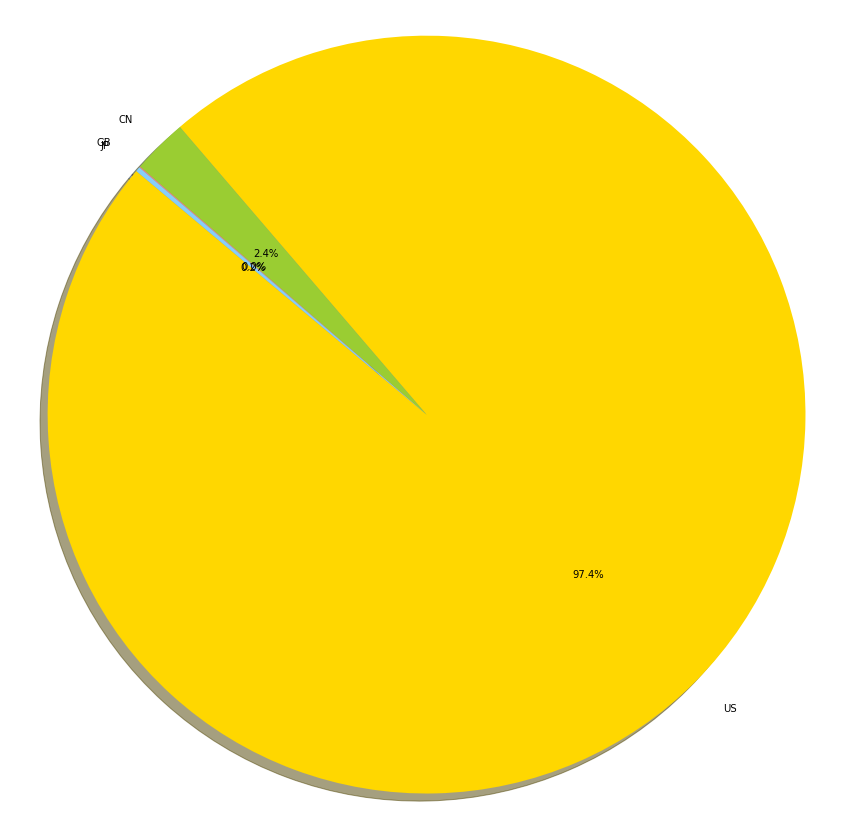

Inventors Network


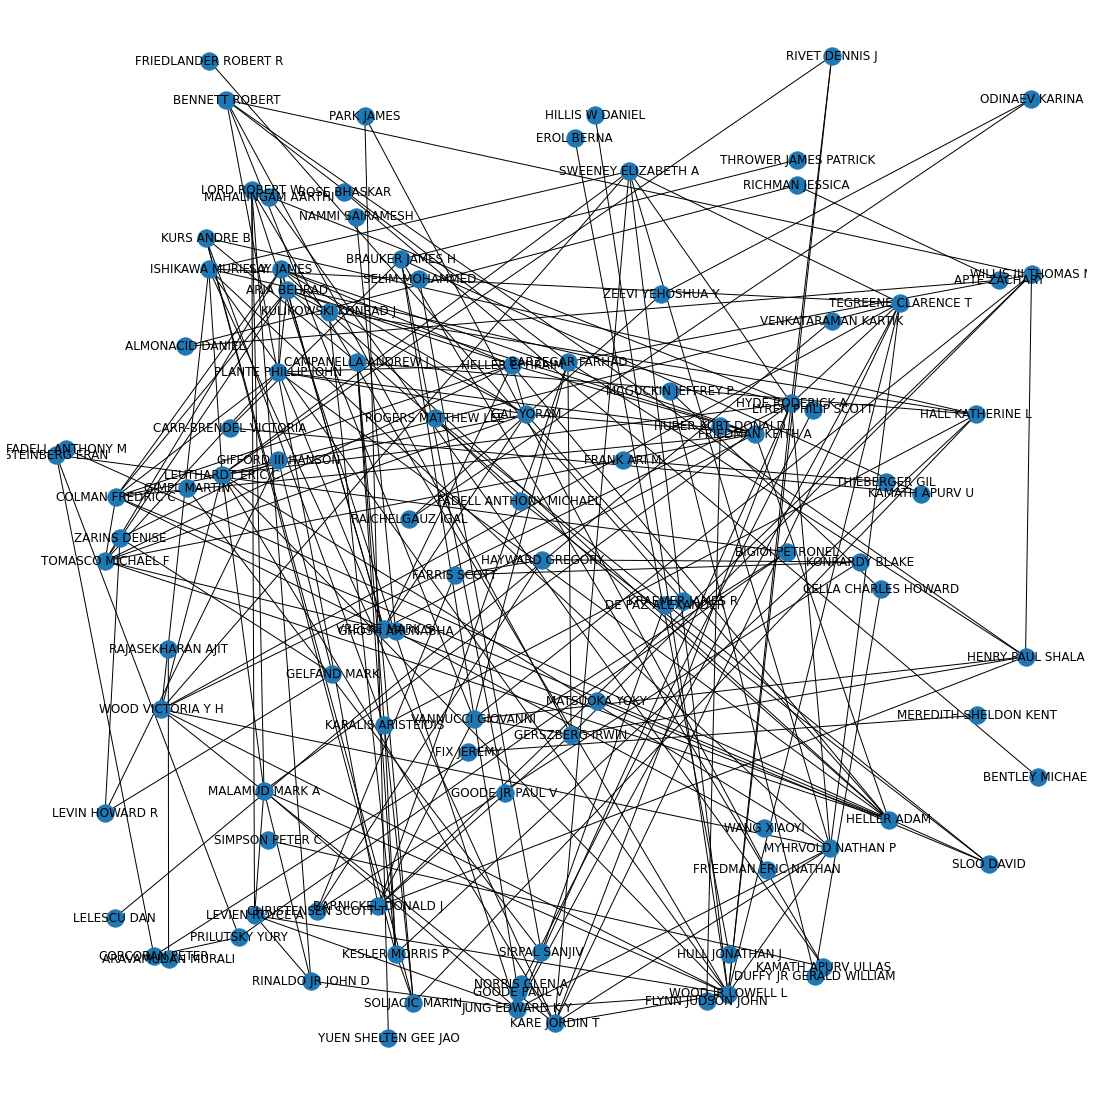

Top Assignees vs Number of Patents


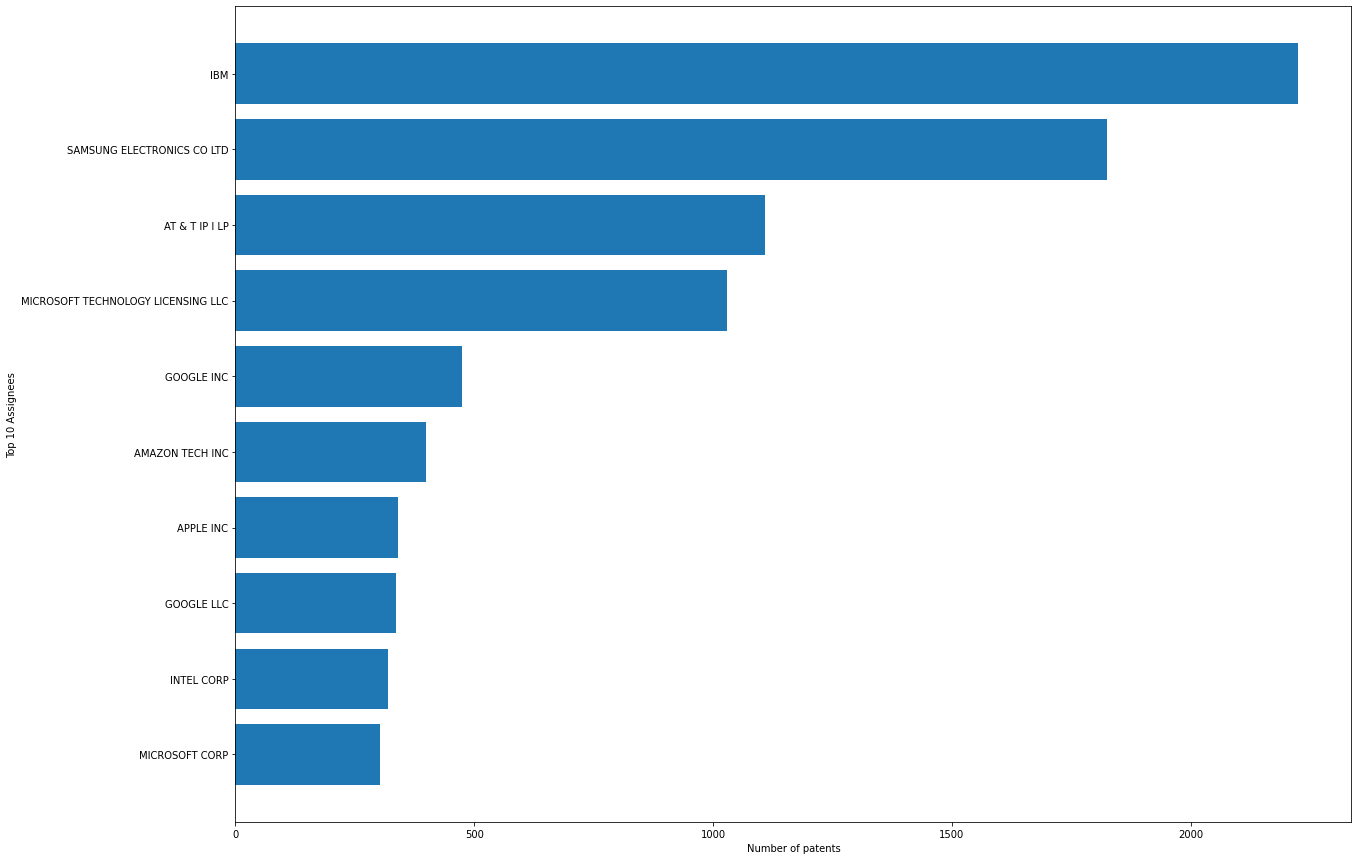

Top Inventors vs Number of Patents


<Figure size 1440x1080 with 0 Axes>

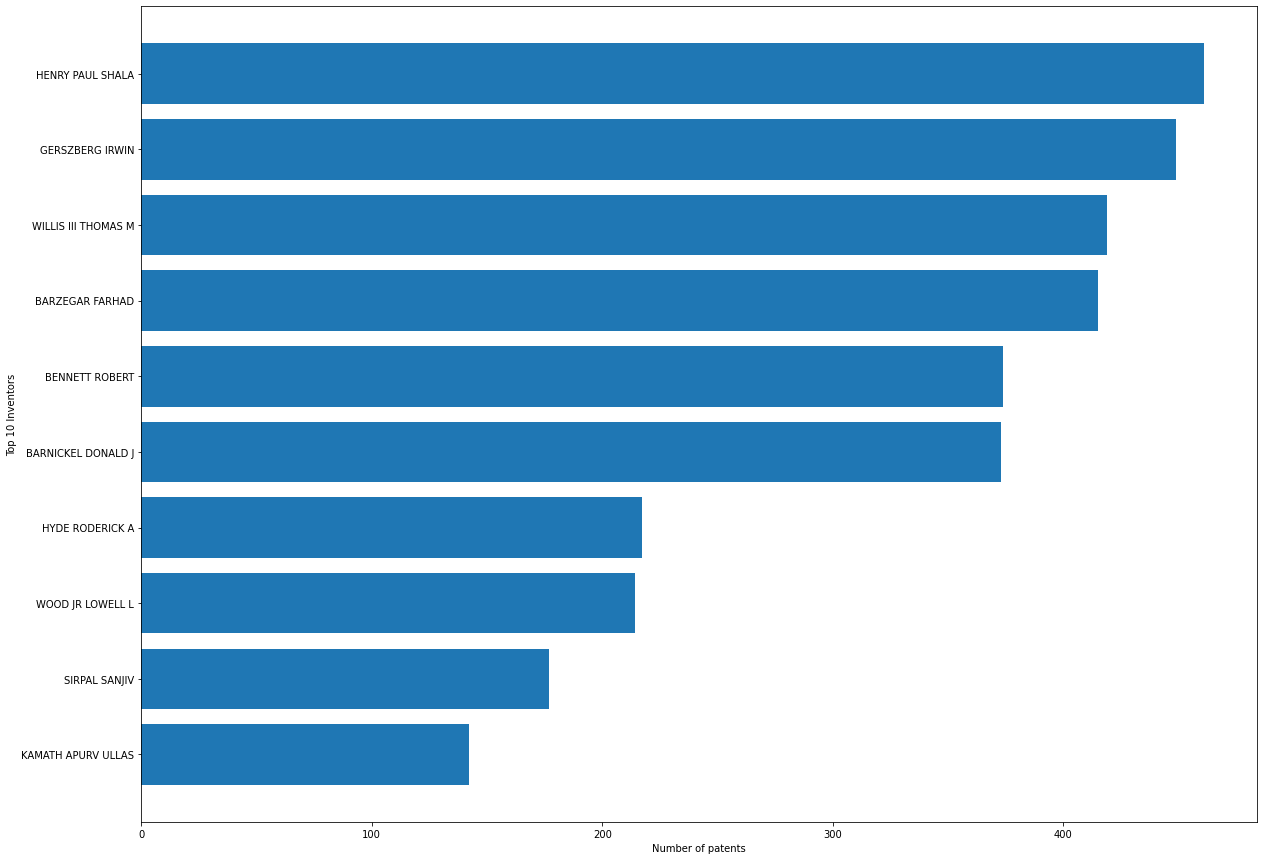

Top Juridictions vs Number of Patents


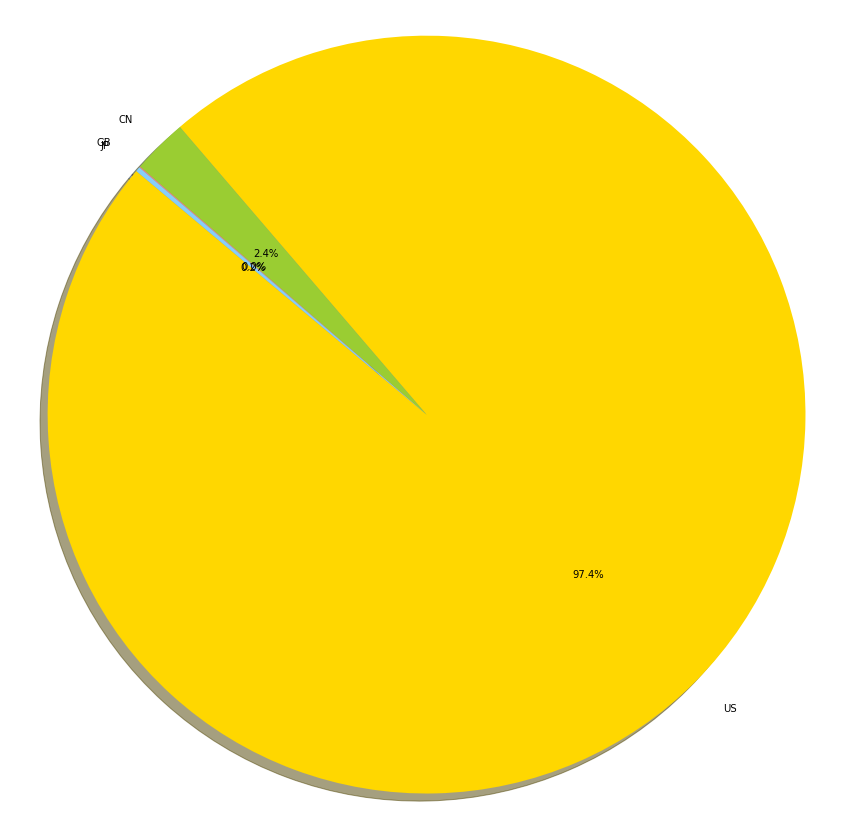

Inventors Network


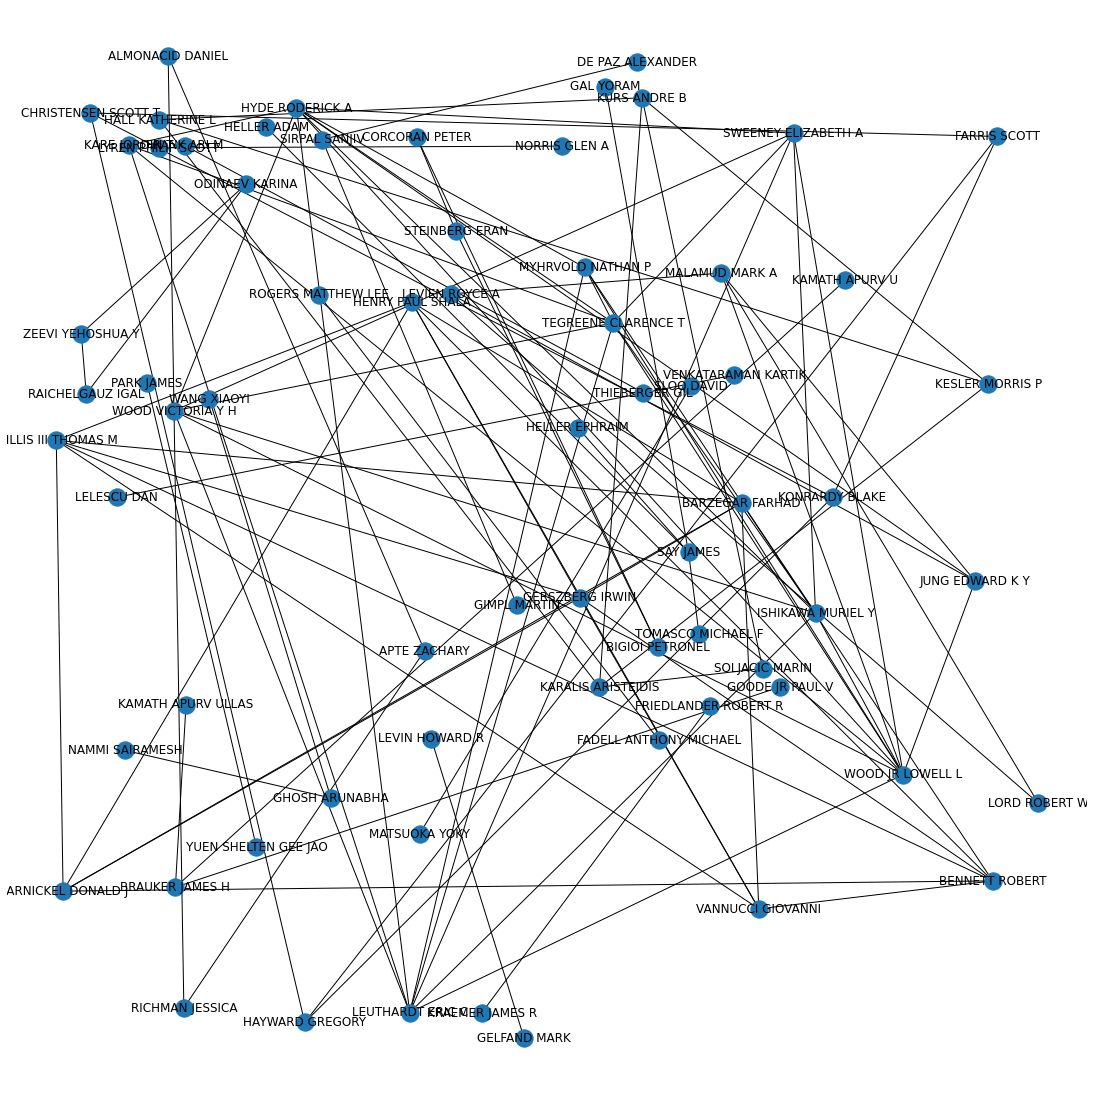

In [1]:
import BibliographicAnalysis as ba
ba.bibliographic_plots('trail_1_AI.csv', top_assignees=10, top_inventors=10)

In [1]:
def count(N):
    if N % 2 == 0:
        return 26**(N/2)
    else:
        return 26**((N+1)/2)

In [10]:
count(5)

17576.0

In [21]:
cars = [6, 2, 12, 7, 4]
cars.sort()     # [2, 6, 7, 12]
min_len = 1000
k = 3
for i in range(0, len(cars)-k):
    length = cars[i+k-1] - cars[i] + 1
    if length < min_len:
        min_len = length
print(length)

4


In [1]:
import math
def is_prime(x):
    if x > 1:
        if x == 2:
            return True
        else:
            for i in range(2, int(math.sqrt(x))+1):
                if x % i == 0:
                    return False
            return True
    return False

In [2]:
def min_steps(x):
    np, nn = x, x
    cp, cn = 0, 0
    while is_prime(np) == False:
        np += 1
        cp += 1
    if x > 2:
        while is_prime(nn) == False:
            nn -= 1
            cn += 1
        return min(cp, cn)
    return cp

In [3]:
def solve(arr):
    cnt = 0
    for i in arr:
        if is_prime(i):
            continue
        else:
            cnt += min_steps(i)
    return cnt

In [18]:
import math
import pandas as pd 
from heapq import nlargest  
import itertools  
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import networkx as nx

def dataframe(filename):
    df = pd.read_csv(filename)
    return df

def assignees_plot(df, top_assignees):
    # converting from pandas Series to list after dropping Empty/Null values
    applicants = df['assignee'].dropna().tolist()

    # making dictionary for assignee (key) -> # of patents (value) 
    applicants_dict = {}
    for i in applicants:
        if len(i) > 2:
            for j in i:
                if i not in applicants_dict.keys():
                    applicants_dict[i] = 1
                else:
                    applicants_dict[i] += 1
    
    # sorted dictionary from high number of patents to low
    applicants_dict_sorted = {k: v for k, v in sorted(applicants_dict.items(), key=lambda item: item[1], reverse = True)}

    # parameter to get top n assignees plot
    out_dict = dict(itertools.islice(applicants_dict_sorted.items(), top_assignees))  
    
    # plotting assignees vs number of patents 
    keys = list(out_dict.keys())
    values = list(out_dict.values())

    #df_assignee = pd.DataFrame({
    #    'Assignee' : keys, 
    #    '# of Patents' : values
    #})
    print('Top Assignees vs Number of Patents')
    plt.figure(figsize = (20, 15))
    #df_assignee.plot_bokeh.barh(x = 'Assignee', y = '# of Patents')
    plt.barh(keys, values, )
    plt.xlabel('Number of patents')
    plt.ylabel(f'Top {top_assignees} Assignees')
    plt.gca().invert_yaxis()
    plt.show()

In [19]:
df = dataframe('ipa200409.csv')

Top Assignees vs Number of Patents


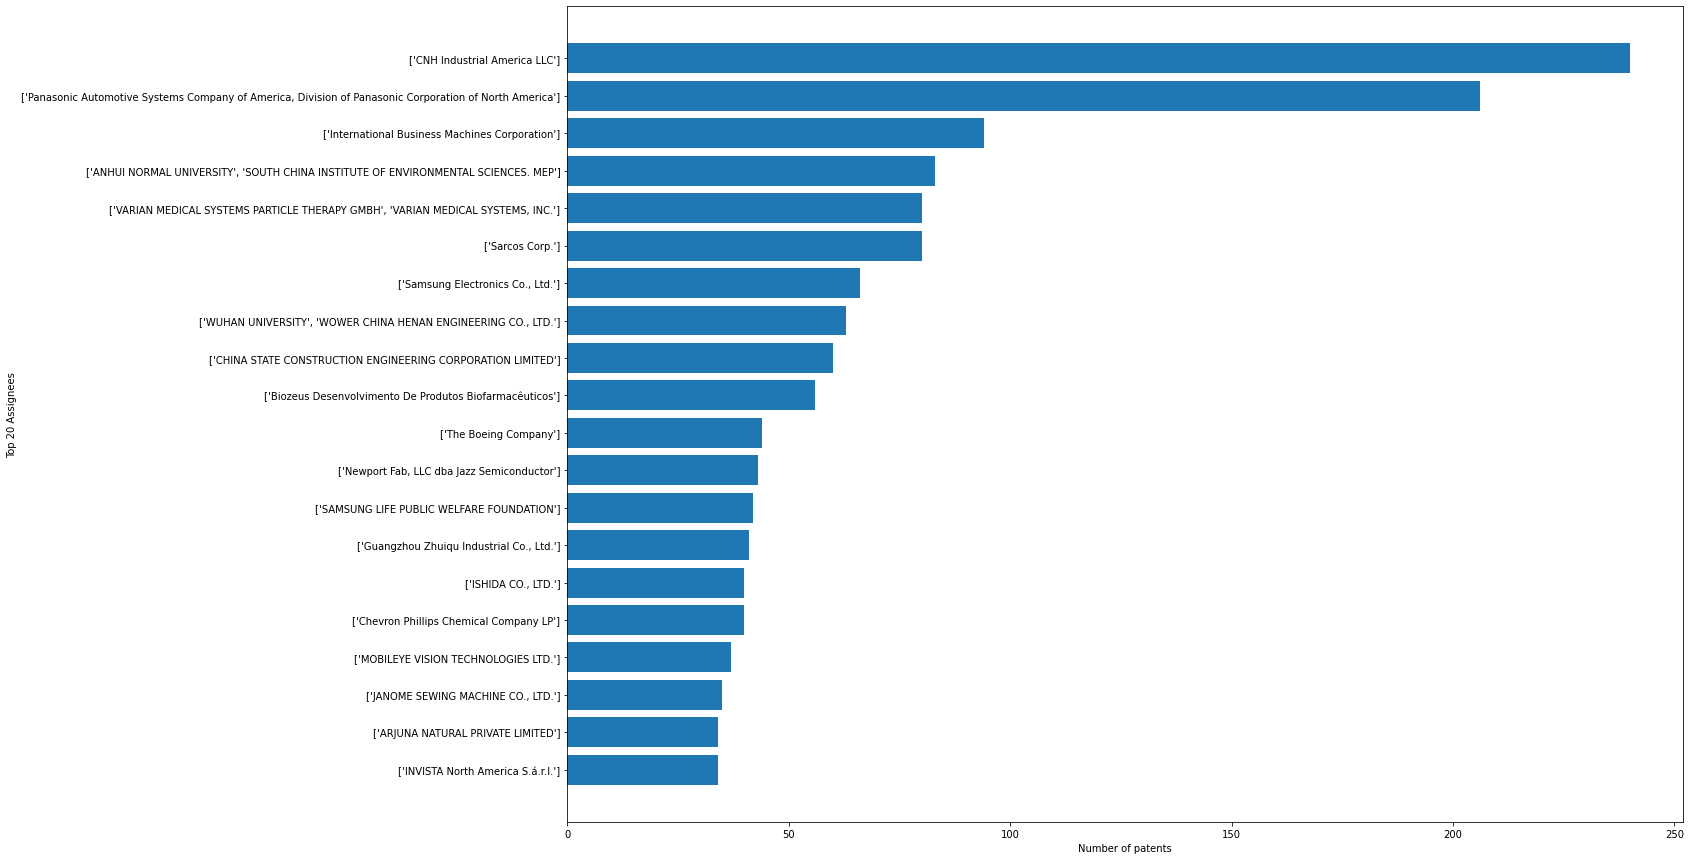

In [20]:
assignees_plot(df, top_assignees=20)

In [16]:
def assignees_plot(df, top_assignees):
    # converting from pandas Series to list after dropping Empty/Null values
    applicants = df['assignee'].dropna().tolist()
    # making dictionary for assignee (key) -> # of patents (value) 
    applicants_dict = {}
    for i in applicants:
        print(type(i))
        #if len(i) != 0 and type(i) == 'list':
        #    print(i)
        #    for j in i:
        #        if i not in applicants_dict.keys():
        #            applicants_dict[i] = 1
        #        else:
        #            applicants_dict[i] += 1

In [17]:
assignees_plot(df, 20)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [1]:
import patent_parser_v2
df = patent_parser_v2.parse_patents('ipa200409.xml')
df.to_csv('ipa200409_v1.csv', header = 'True', index = 'False  ')
df

juridiction  pub_year kind  app_year app_type prior_year prior_country  \
0             US      2020   A1      2019  utility       2017            RU   
1             US      2020   A1      2018  utility       2017            FR   
2             US      2020   A1      2019  utility                            
3             US      2020   A1      2018  utility                            
4             US      2020   A1      2018  utility                            
...          ...       ...  ...       ...      ...        ...           ...   
5621          US      2020   P1      2019    plant                            
5622          US      2020   P1      2019    plant                            
5623          US      2020   P1      2019    plant                            
5624          US      2020   P1      2019    plant                            
5625          US      2020   P1      2019    plant                            

                                                  title  \
0     METHOD FOR CULTIVATING SOWN CROPS AND APPARATU...   
1                 HITCH DEVICE FOR AGRICULTURAL VEHICLE   
2         COMPACT ROW CLOSER AND ROW CLEANER ASSEMBLIES   
3     SYSTEM AND RELATED METHODS FOR MONITORING AND ...   
4     SYSTEM AND METHOD FOR CONTROLLING THE SPEED OF...   
...                                                 ...   
5621             Calla lily plant named 'Peter's Pride'   
5622             Calla lily plant named 'Diva Himalaya'   
5623               Calla Lily plant named 'Diva Alpina'   
5624              Calla lily plant named 'Diva Siberia'   
5625               Calla Lily Plant Named 'Diva Bianca'   

                          assignee  \
0                             None   
1                             None   
2                             None   
3     CNH Industrial America LLC;;   
4     CNH Industrial America LLC;;   
...                            ...   
5621                          None   
5622                          None   
5623                          None   
5624                          None   
5625                          None   

                                              inventors  \
0                       Sergei Vladimirovich BRINDYUK;;   
1                                     Hubert DEFRANCQ;;   
2     Ronald Steve Martin;;Travis Harnetiaux;;Asghar...   
3                                         Ivan Antich;;   
4     Christopher Schoeny;;Trevor Stanhope;;Darian E...   
...                                                 ...   
5621                                    Peter Beckman;;   
5622                                    Peter Beckman;;   
5623                                    Peter Beckman;;   
5624                                    Peter Beckman;;   
5625                                    Peter Beckman;;   

                                               abstract  \
0     A method for increasing the efficiency of farm...   
1     A hitch device for an implement is capable of ...   
2     An apparatus and system for adjustably control...   
3     In one aspect, a method is disclosed for adjus...   
4     In one aspect, a system for controlling the sp...   
...                                                 ...   
5621  ‘Peter's Pride’ is a new variety of calla lily...   
5622  ‘Diva Himalaya’ is a new variety of calla lily...   
5623  ‘Diva Alpina’ is a new variety of calla lily p...   
5624  ‘Diva Siberia’ is a new variety of calla lily ...   
5625  ‘Diva Bianca’ is a new variety of calla lily p...   

                                                 claims  
0     in a technological operation, preparing the fi...  
1     a first chassis ( a second chassis ( means ( a...  
2     a frame mounting plate; a set of at least two ...  
3     determining, by the computing device, a target...  
4     a furrow closing assembly including at least o...  
...                                                 ...  
5621                                                     
5622    

In [28]:
df.to_csv('ipa200409_v1.csv', header = 'True', index = 'False  ')

In [52]:
def assignees_plot(df, top_assignees):
    # converting from pandas Series to list after dropping Empty/Null values
    #applicants = df['Applicants'].dropna().tolist()
    assignees = df['assignee'][df['assignee'] != ''].dropna().tolist()
    # making dictionary for assignee (key) -> # of patents (value) 
    applicants_dict = {}
    for i in assignees:
        l = i.split(';;')
        for j in l:
            if j != '':
                if j in applicants_dict.keys():
                    applicants_dict[j] += 1
                else:
                    applicants_dict[j] = 1
    #for i in applicants:
    #    if i not in applicants_dict.keys():
    #        applicants_dict[i] = 1
    #    else:
    #        applicants_dict[i] += 1
    
    # sorted dictionary from high number of patents to low
    applicants_dict_sorted = {k: v for k, v in sorted(applicants_dict.items(), key=lambda item: item[1], reverse = True)}
    applicants_dict_sorted_items = applicants_dict_sorted.items()

    # parameter to get top n assignees plot
    out_dict = list(applicants_dict_sorted_items)[:top_assignees]
    
    # plotting assignees vs number of patents 
    keys = [k[0] for k in out_dict]
    values = [k[1] for k in out_dict]

    print('Top Assignees vs Number of Patents')
    plt.figure(figsize = (20, 15))
    #df_assignee.plot_bokeh.barh(x = 'Assignee', y = '# of Patents')
    plt.barh(keys, values, )
    plt.xlabel('Number of patents')
    plt.ylabel(f'Top {top_assignees} Assignees')
    plt.gca().invert_yaxis()
    plt.show() 

In [53]:
import math
import pandas as pd 
from heapq import nlargest  # to find n largest from dictionary
import itertools  
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import networkx as nx


Top Assignees vs Number of Patents


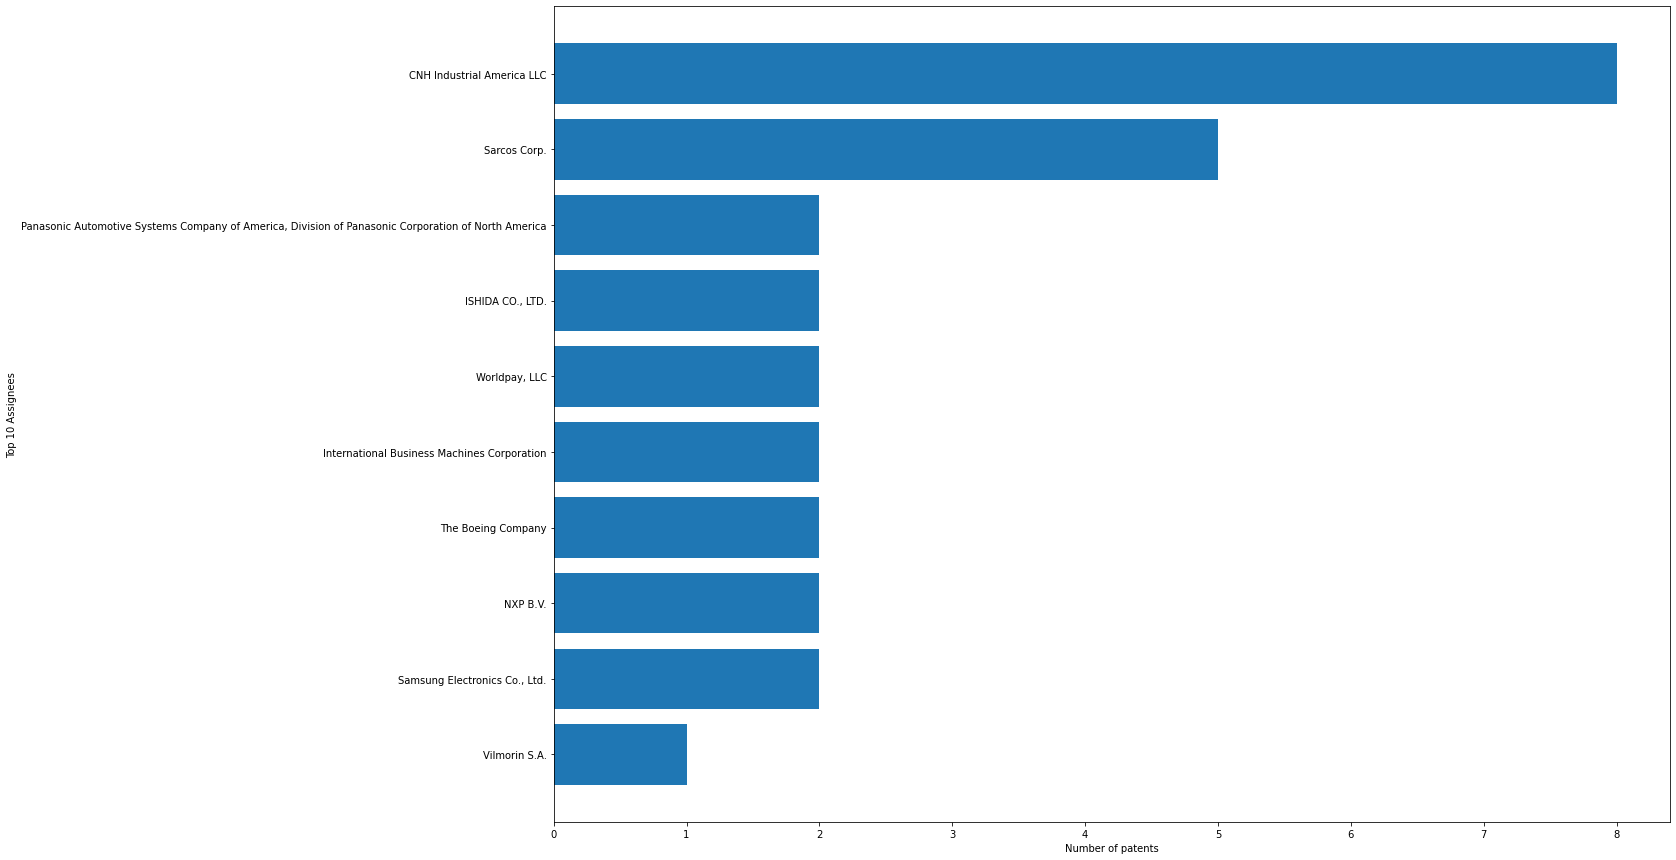

In [54]:
assignees_plot(df, 10)

In [65]:
def inventors_plot(df, top_inventors):
    # converting from pandas Series to list after dropping Empty/Null values
    inventors = df['inventors'][df['inventors'] != ''].dropna().tolist()

    # making dictionary for assignee (key) -> # of patents (value) 
    inventors_dict = {}
    for i in inventors:
        l = i.split(';;')
        for j in l:
            if j != '':
                if j in inventors_dict.keys():
                    inventors_dict[j] += 1
                else:
                    inventors_dict[j] = 1
                
    # sorted dictionary from high number of patents to low
    inventors_dict_sorted = {k: v for k, v in sorted(inventors_dict.items(), key=lambda item: item[1], reverse = True)}
    inventors_dict_sorted_items = inventors_dict_sorted.items()

    # parameter to get top n invetors plot
    out_dict = list(inventors_dict_sorted_items)[:top_inventors]

    # plotting assignees vs number of patents 
    keys = [k[0] for k in out_dict]
    values = [k[1] for k in out_dict]

    print('Top Inventors vs Number of Patents')
    plt.figure(figsize = (20, 15))
    #df_inventor.plot_bokeh.barh(x = 'Inventors', y = '# of Patents')
    plt.figure(figsize = (20, 15))
    plt.barh(keys, values)
    plt.xlabel('Number of patents')
    plt.ylabel(f'Top {top_inventors} Inventors')
    plt.gca().invert_yaxis()
    plt.show()


Top Inventors vs Number of Patents


<Figure size 1440x1080 with 0 Axes>

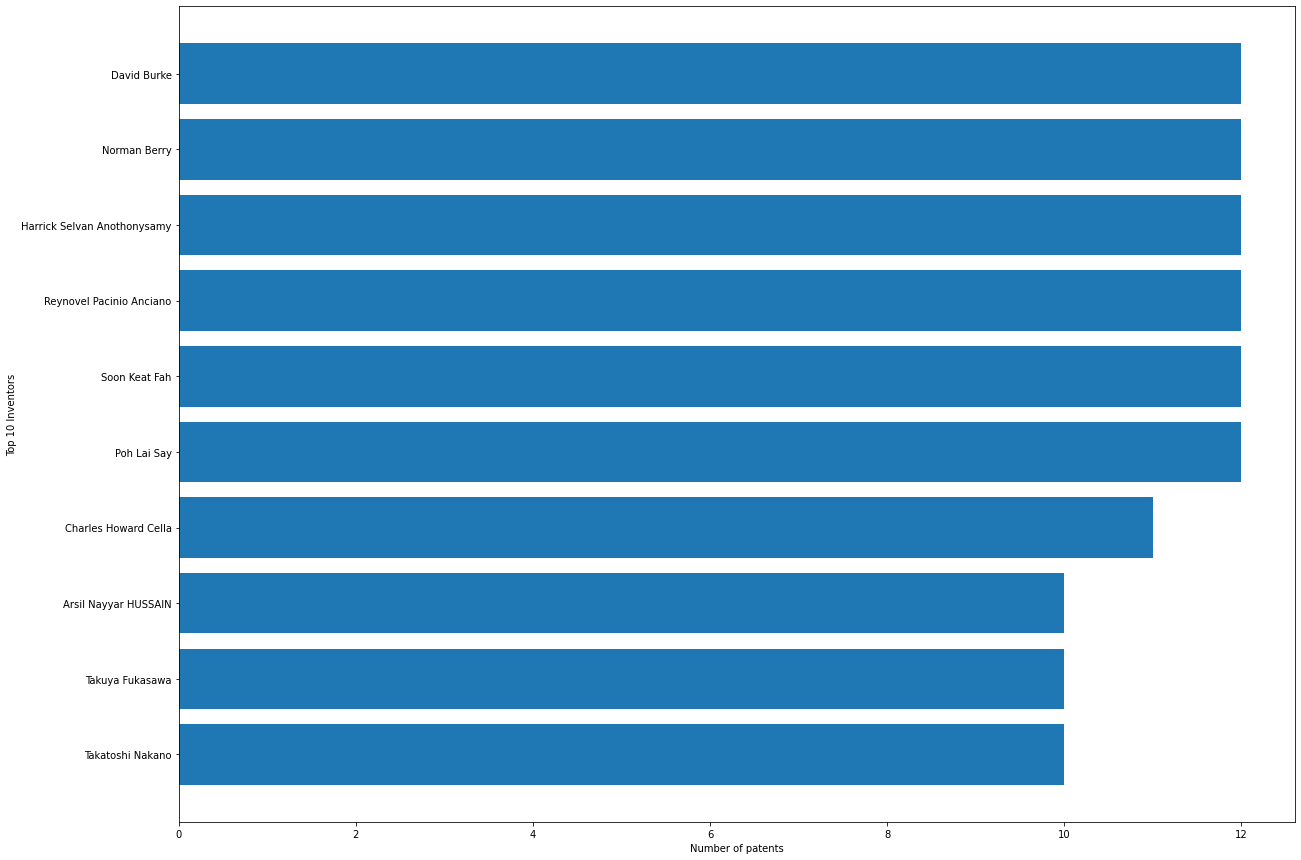

In [66]:
inventors_plot(df, 10)

In [10]:
def juridiction_plot(df):
   # converting from pandas Series to list after dropping Empty/Null values
    juridictions = df['juridiction'].dropna().tolist()

    # making dictionary for assignee (key) -> # of patents (value) 
    juridictions_dict = {}
    for i in juridictions:
        if len(i) <= 3:
            if i not in juridictions_dict.keys():
                juridictions_dict[i] = 1
            else:
                juridictions_dict[i] += 1

    # Pie Chart for Juridictions vs # of patents
    labels = list(juridictions_dict.keys())
    sizes = list(juridictions_dict.values())

    print('Top Juridictions vs Number of Patents')
    plt.figure(figsize = (15, 15))
    plt.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

Top Juridictions vs Number of Patents


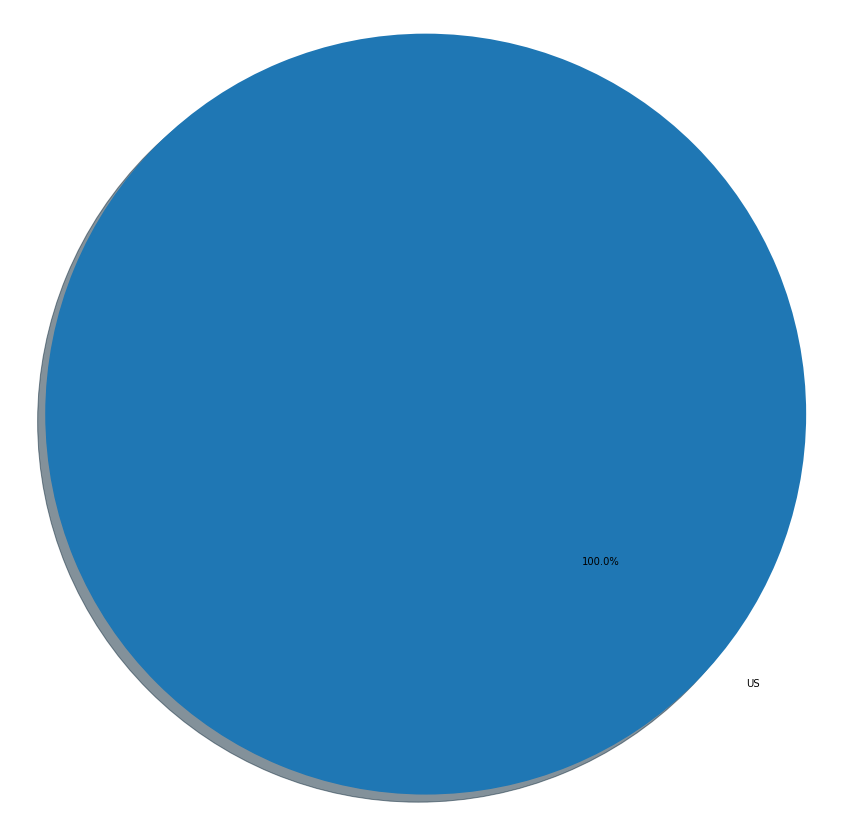

In [11]:
juridiction_plot(df)

In [12]:
def prior_country_plt(df):
   # converting from pandas Series to list after dropping Empty/Null values
    juridictions = df['prior_country'].dropna().tolist()

    # making dictionary for assignee (key) -> # of patents (value) 
    juridictions_dict = {}
    for i in juridictions:
        if len(i) <= 3:
            if i not in juridictions_dict.keys():
                juridictions_dict[i] = 1
            else:
                juridictions_dict[i] += 1

    # Pie Chart for Juridictions vs # of patents
    labels = list(juridictions_dict.keys())
    sizes = list(juridictions_dict.values())
    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

    print('Prior Country vs % of Patents')
    plt.figure(figsize = (15, 15))
    plt.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

In [7]:

df = pd.read_csv('ipa200409_v1.csv')
df

Unnamed: 0 juridiction  pub_year kind  app_year app_type  prior_year  \
0              0          US      2020   A1      2019  utility      2017.0   
1              1          US      2020   A1      2018  utility      2017.0   
2              2          US      2020   A1      2019  utility         NaN   
3              3          US      2020   A1      2018  utility         NaN   
4              4          US      2020   A1      2018  utility         NaN   
...          ...         ...       ...  ...       ...      ...         ...   
5621        5621          US      2020   P1      2019    plant         NaN   
5622        5622          US      2020   P1      2019    plant         NaN   
5623        5623          US      2020   P1      2019    plant         NaN   
5624        5624          US      2020   P1      2019    plant         NaN   
5625        5625          US      2020   P1      2019    plant         NaN   

     prior_country                                              title  \
0               RU  METHOD FOR CULTIVATING SOWN CROPS AND APPARATU...   
1               FR              HITCH DEVICE FOR AGRICULTURAL VEHICLE   
2              NaN      COMPACT ROW CLOSER AND ROW CLEANER ASSEMBLIES   
3              NaN  SYSTEM AND RELATED METHODS FOR MONITORING AND ...   
4              NaN  SYSTEM AND METHOD FOR CONTROLLING THE SPEED OF...   
...            ...                                                ...   
5621           NaN             Calla lily plant named 'Peter's Pride'   
5622           NaN             Calla lily plant named 'Diva Himalaya'   
5623           NaN               Calla Lily plant named 'Diva Alpina'   
5624           NaN              Calla lily plant named 'Diva Siberia'   
5625           NaN               Calla Lily Plant Named 'Diva Bianca'   

                          assignee  \
0                              NaN   
1                              NaN   
2                              NaN   
3     CNH Industrial America LLC;;   
4     CNH Industrial America LLC;;   
...                            ...   
5621                           NaN   
5622                           NaN   
5623                           NaN   
5624                           NaN   
5625                           NaN   

                                              inventors  \
0                       Sergei Vladimirovich BRINDYUK;;   
1                                     Hubert DEFRANCQ;;   
2     Ronald Steve Martin;;Travis Harnetiaux;;Asghar...   
3                                         Ivan Antich;;   
4     Christopher Schoeny;;Trevor Stanhope;;Darian E...   
...                                                 ...   
5621                                    Peter Beckman;;   
5622                                    Peter Beckman;;   
5623                                    Peter Beckman;;   
5624                                    Peter Beckman;;   
5625                                    Peter Beckman;;   

                                               abstract  \
0     A method for increasing the efficiency of farm...   
1     A hitch device for an implement is capable of ...   
2     An apparatus and system for adjustably control...   
3     In one aspect, a method is disclosed for adjus...   
4     In one aspect, a system for controlling the sp...   
...                                                 ...   
5621  ‘Peter's Pride’ is a new variety of calla lily...   
5622  ‘Diva Himalaya’ is a new variety of calla lily...   
5623  ‘Diva Alpina’ is a new variety of calla lily p...   
5624  ‘Diva Siberia’ is a new variety of calla lily ...   
5625  ‘Diva Bianca’ is a new variety of calla lily p...   

                                                 claims  
0     in a technological operation, preparing the fi...  
1     a first chassis ( a second chassis ( means ( a...  
2     a frame mounting plate; a set of at least two ...  
3     determining, by the computing device, a target...  
4     a furrow closing asse

Prior Country vs % of Patents


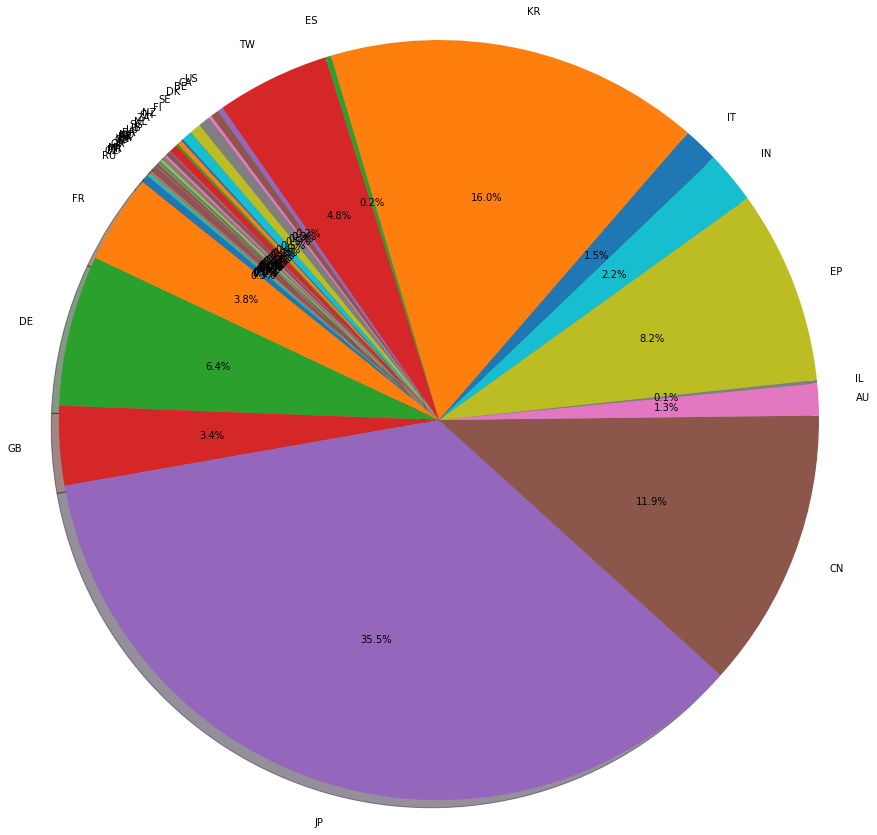

In [15]:
def inventors_network(df, top_pairs = 100):
    # converting from pandas Series to list after dropping Empty/Null values
    inventors = df['inventors'][df['inventors'] != ''].dropna().tolist()

    # making dictionary for assignee (key) -> # of patents (value) 
    inventors_net = {}
    for j in inventors:
        inventor = j.split(";;")
        for i in inventor:
            if i != '':
                for j in inventor:
                    if i != j:
                        key1 = i + ',' + j
                        key2 = j + ',' + i
                        if key1 not in inventors_net.keys() and key2 not in inventors_net.keys():
                            inventors_net[key1] = 1
                        elif key1 in inventors_net.keys():
                            inventors_net[key1] += 1
                        elif key2 in inventors_net.keys():
                            inventors_net[key2] += 1
    
    # sorted dictionary from high number of patents to low
    inventors_net_sorted = {k: v for k, v in sorted(inventors_net.items(), key=lambda item: item[1], reverse = True)}   

    # parameter to get top n invetors plot
    out_net_inventor = dict(itertools.islice(inventors_net_sorted.items(), top_pairs))  

    inventor1 = []
    inventor2 = []
    count = []
    for i in out_net_inventor:
        inven = i.split(',')
        inventor1.append(inven[0])
        inventor2.append(inven[1])
        count.append(out_net_inventor[i])

    df_net = pd.DataFrame({
        'inventor1' : inventor1,
        'inventor2' : inventor2,
        'patent_count' : count
    })

    print('Inventors Network')

    G = nx.Graph()
    G = nx.from_pandas_edgelist(df_net, 'inventor1', 'inventor2', edge_attr = 'patent_count')
    #count = [i['patent_count'] for i in dict(G.edges).values()]
    #labels = [i for i in dict(G.nodes).keys()]
    #labels = {i:i for i in dict(G.nodes).keys()}
    plt.figure(figsize = (15, 15))
    nx.draw_random(G, with_labels=True)
    plt.show()

Inventors Network


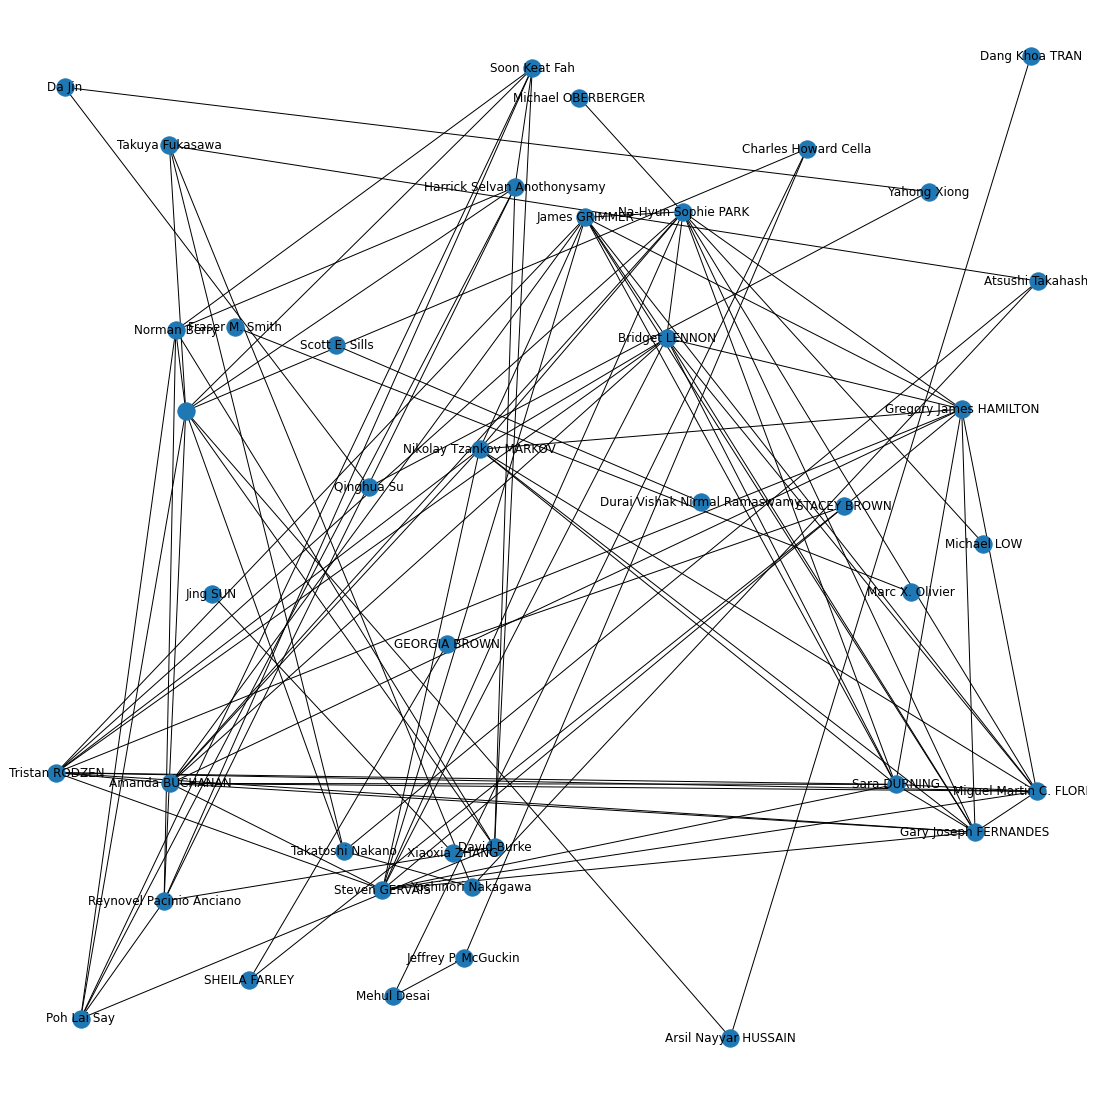

In [16]:
inventors_network(df)